In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import math

In [9]:
code_file='表编号.csv'
sensor_code_list=[]
with open(code_file,'r',encoding='UTF-8')as f:
    reader = csv.reader(f)
    for rows in reader:
        for row in rows:
            codes=row.split(',')
            for code in codes:
                if code!='':
                    sensor_code_list.append(code)

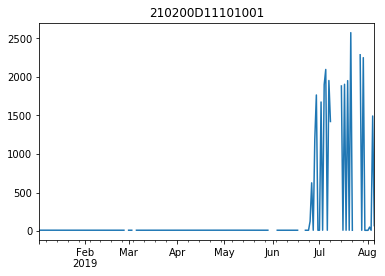

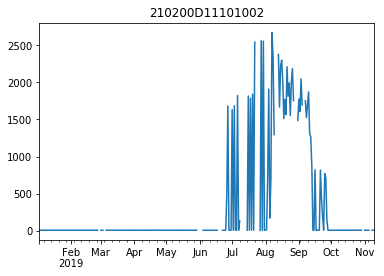

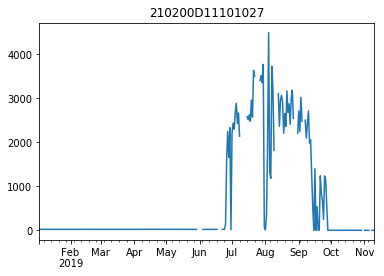

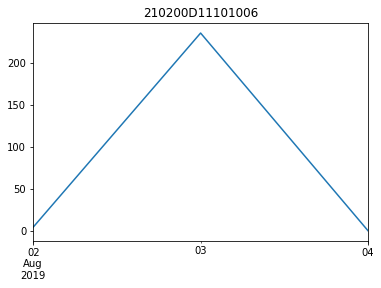

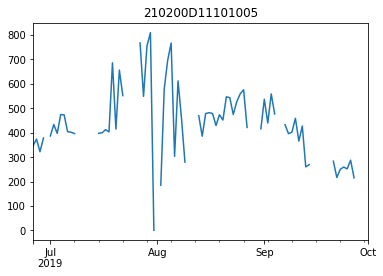

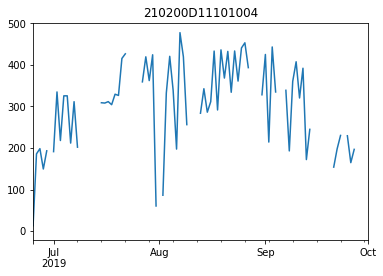

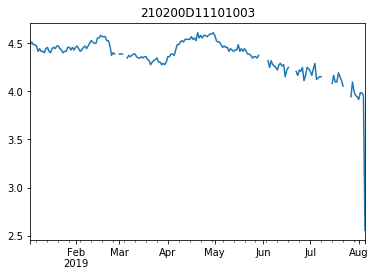

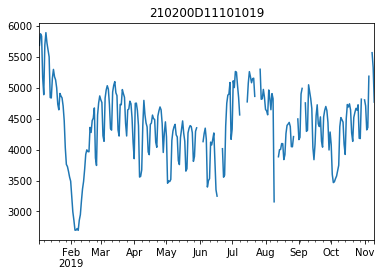

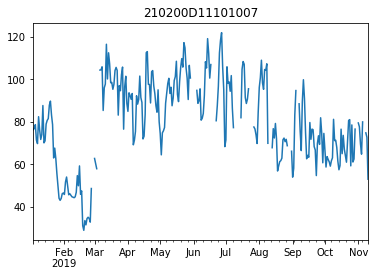

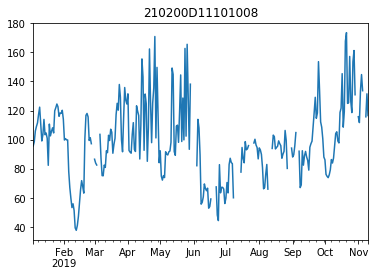

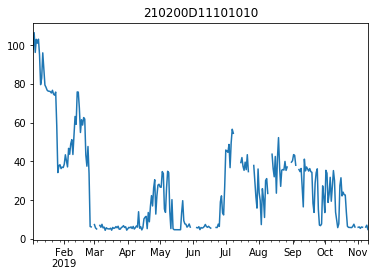

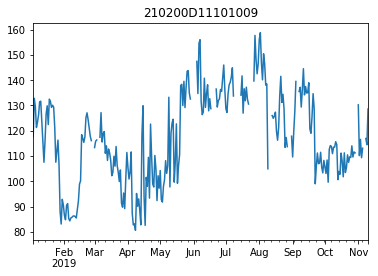

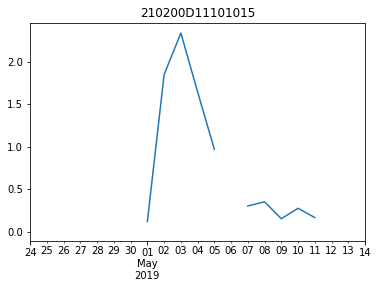

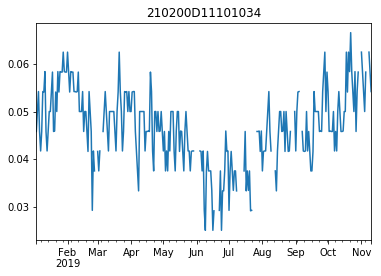

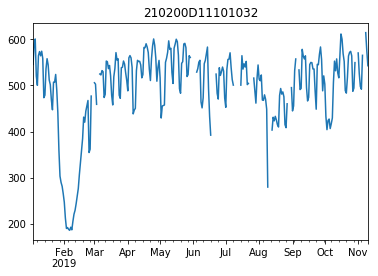

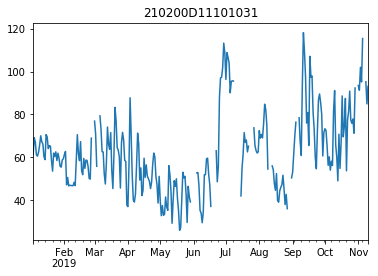

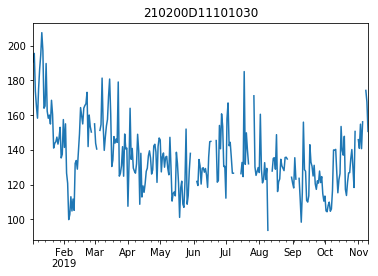

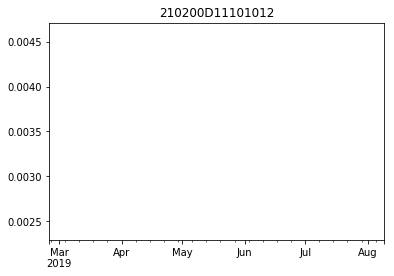

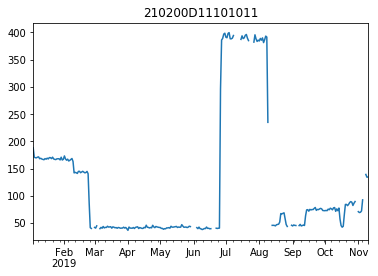

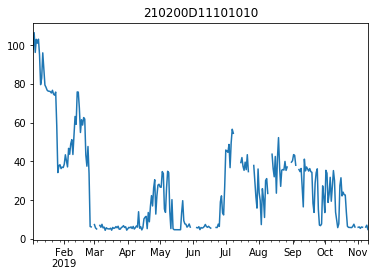

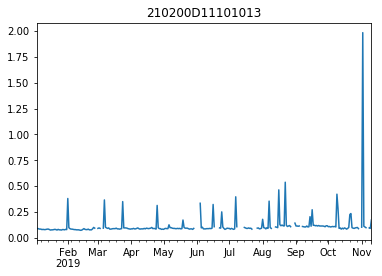

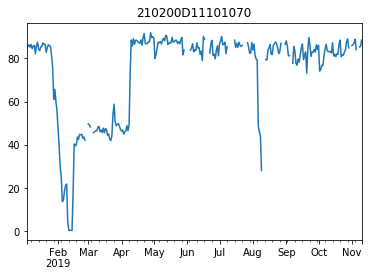

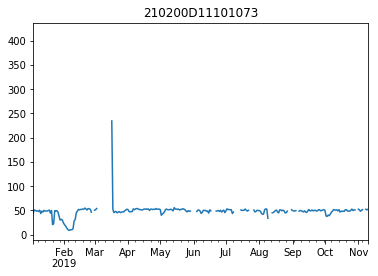

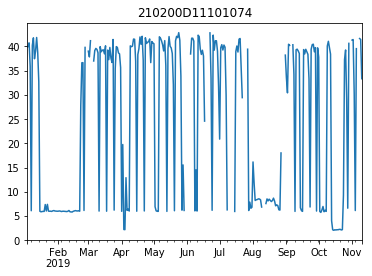

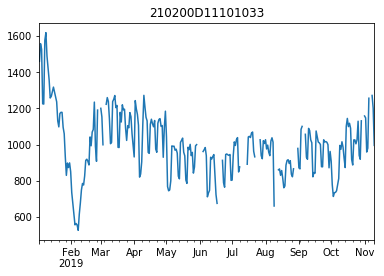

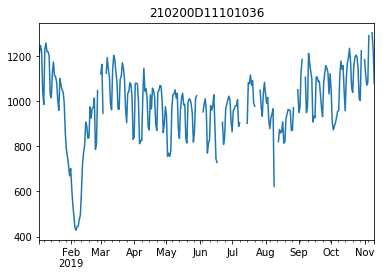

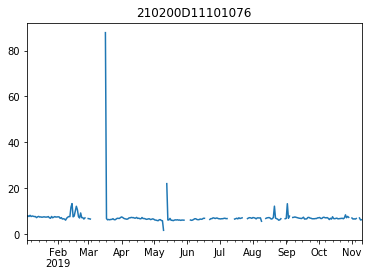

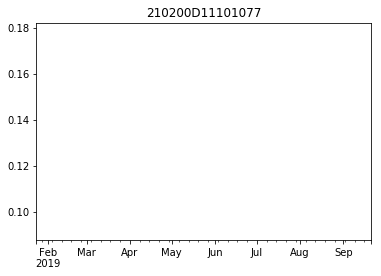

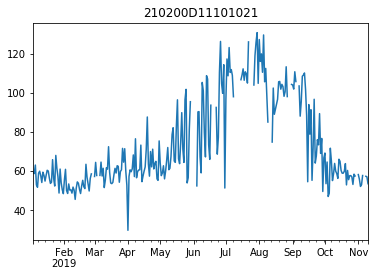

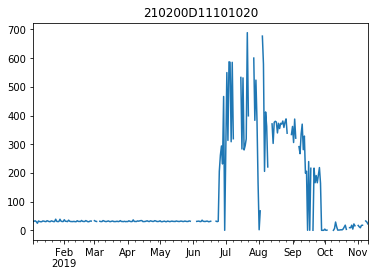

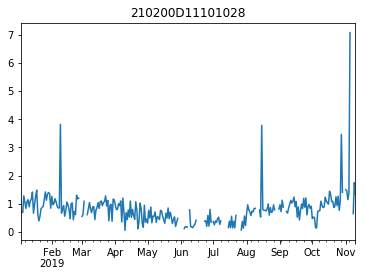

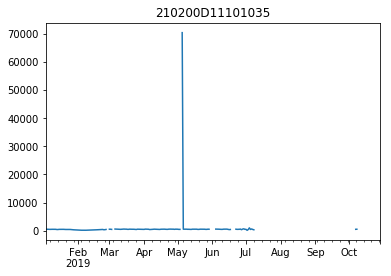

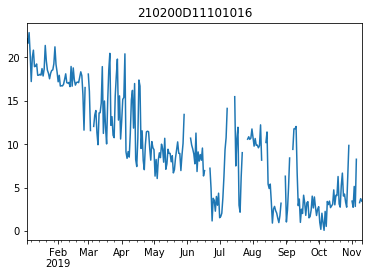

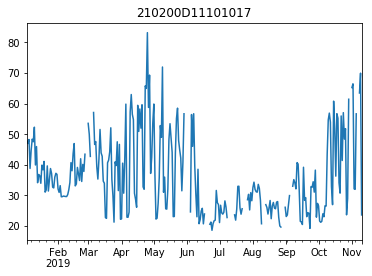

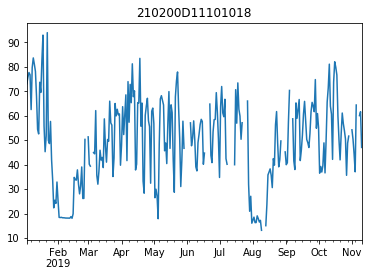

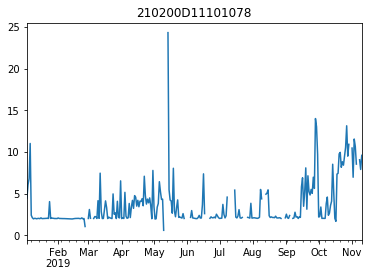

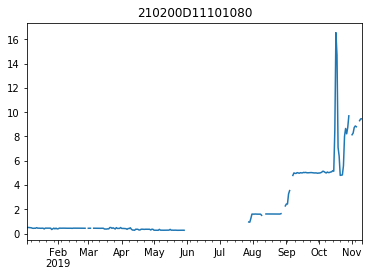

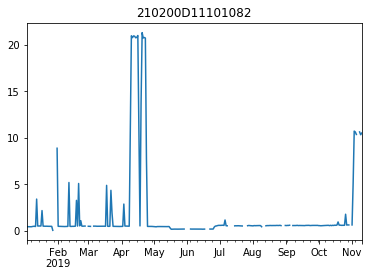

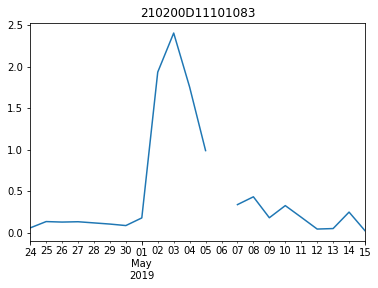

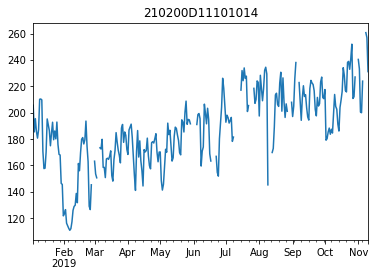

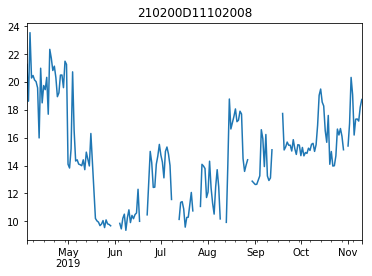

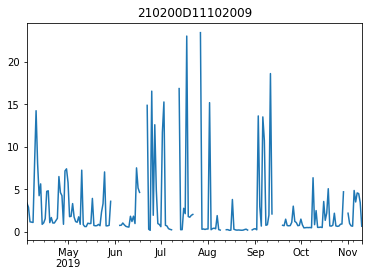

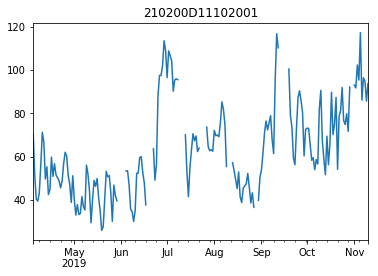

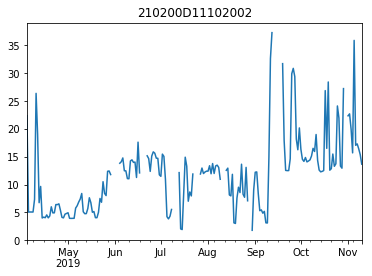

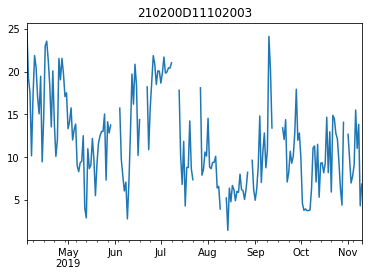

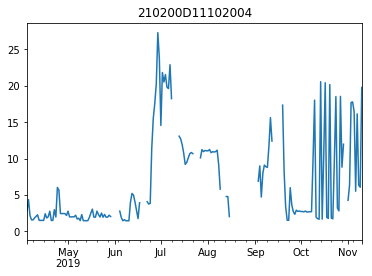

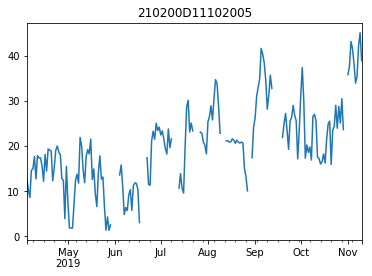

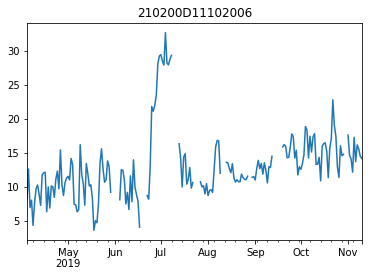

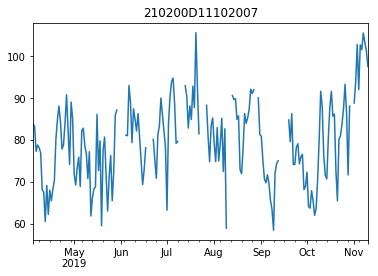

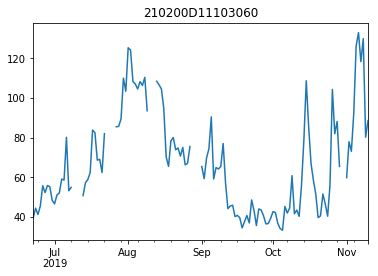

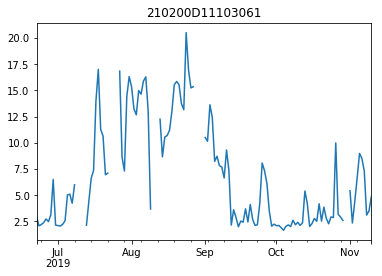

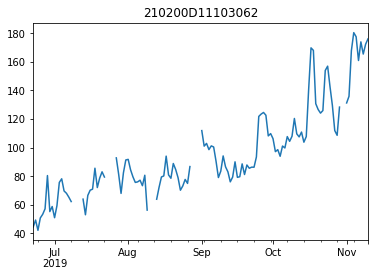

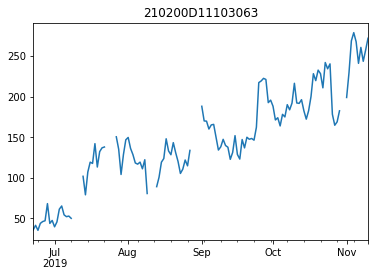

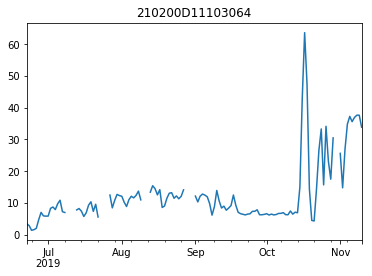

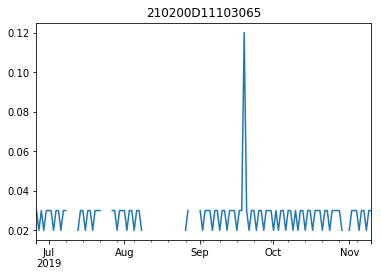

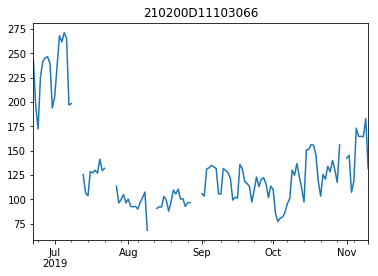

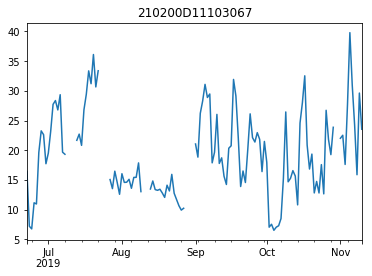

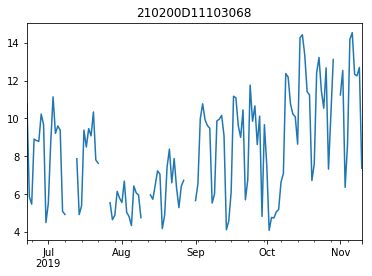

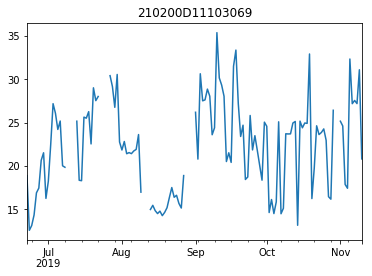

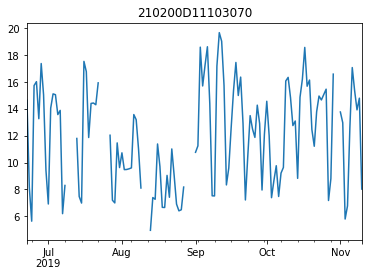

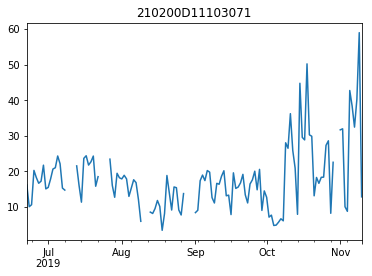

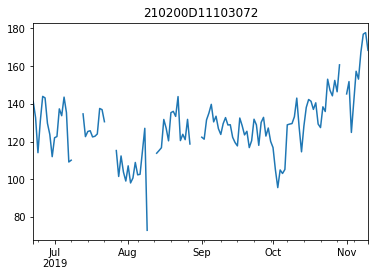

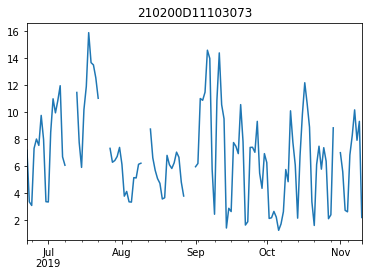

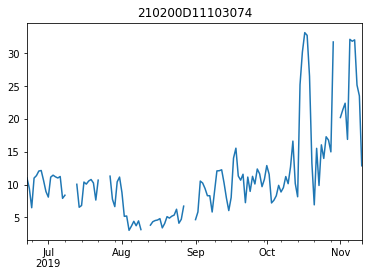

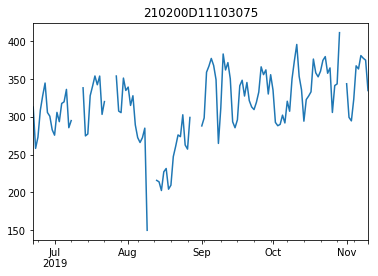

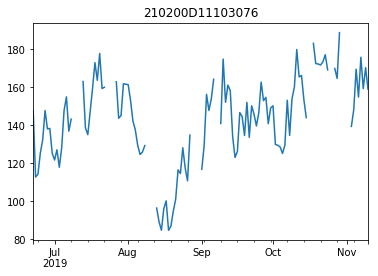

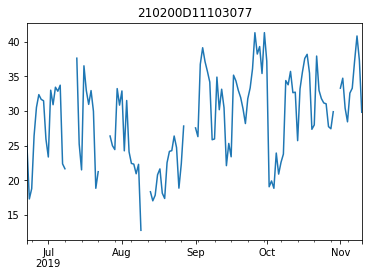

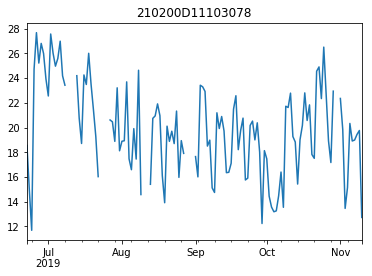

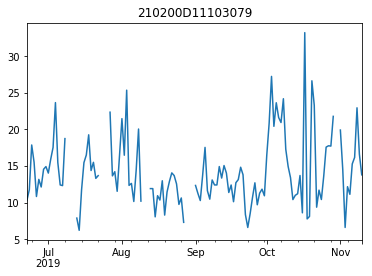

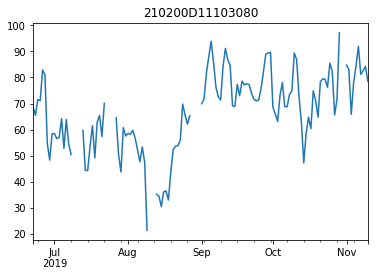

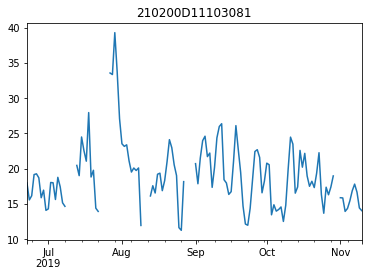

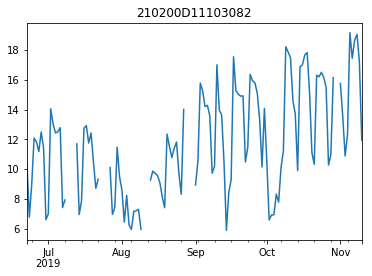

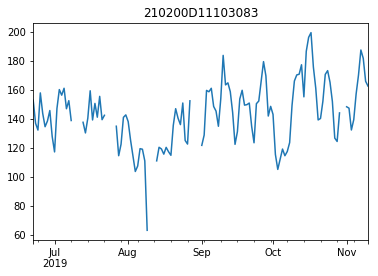

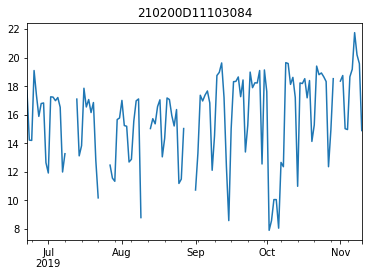

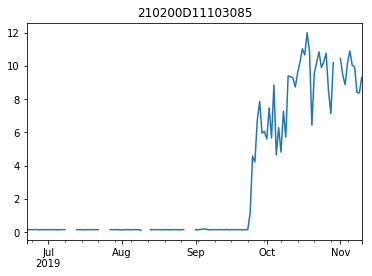

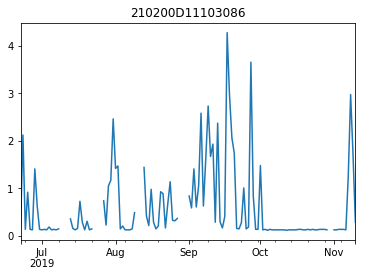

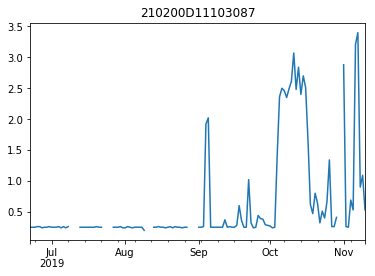

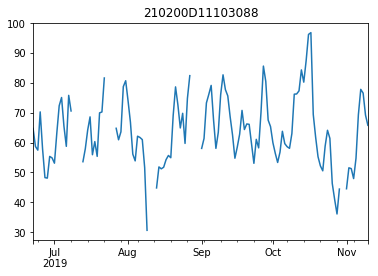

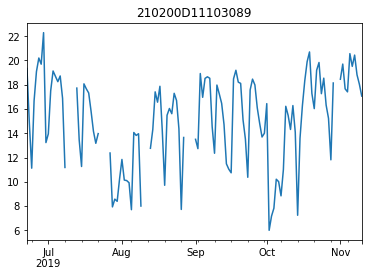

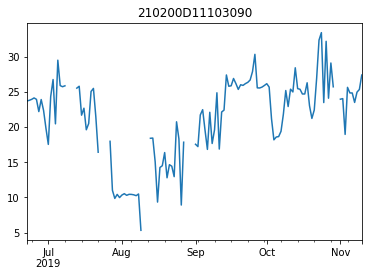

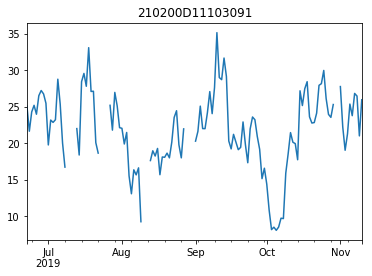

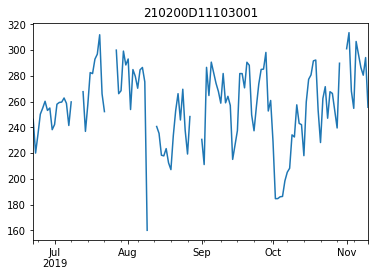

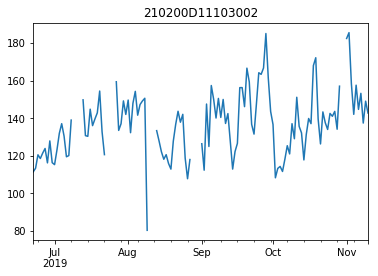

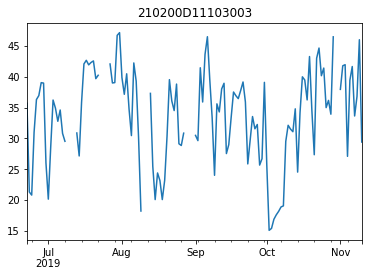

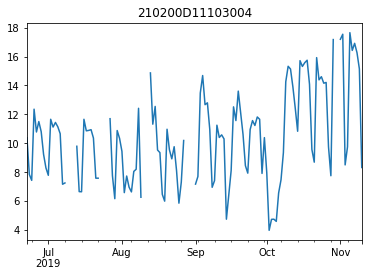

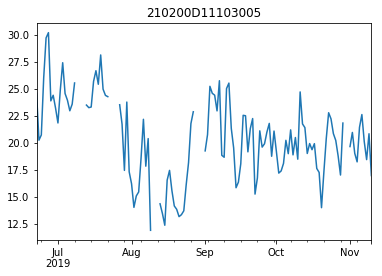

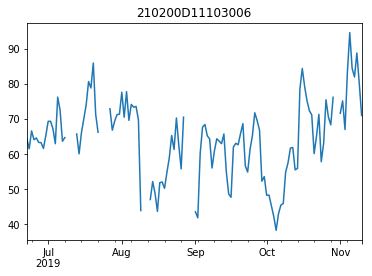

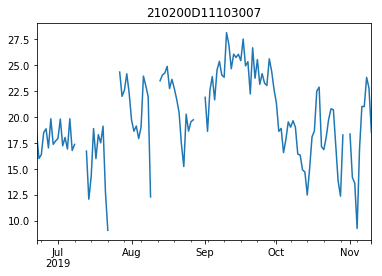

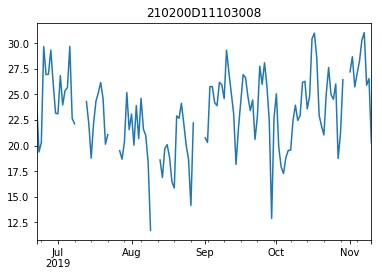

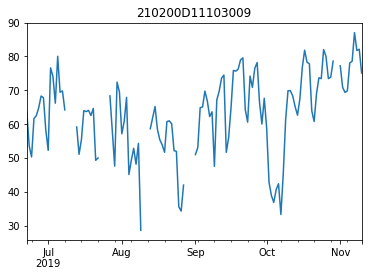

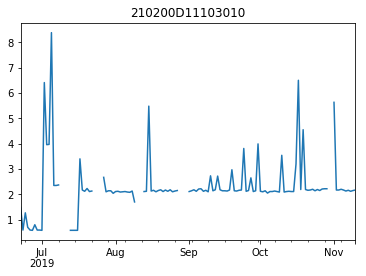

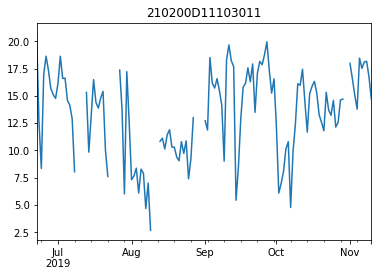

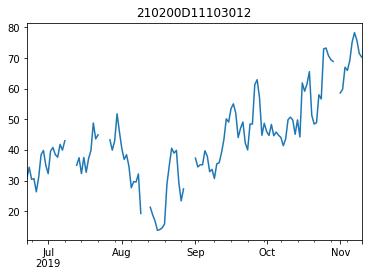

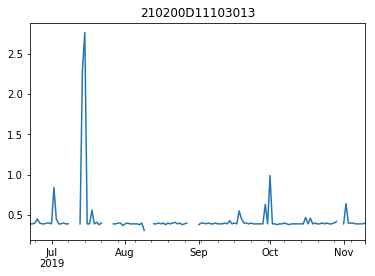

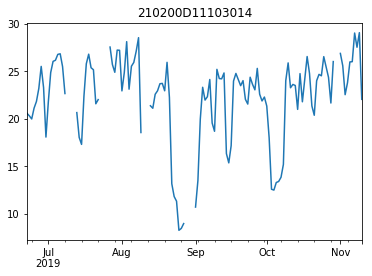

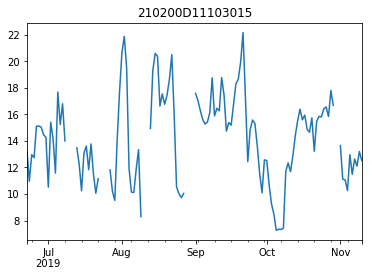

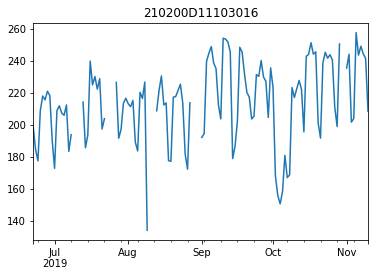

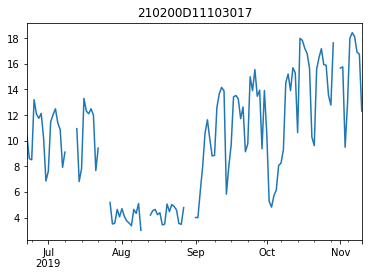

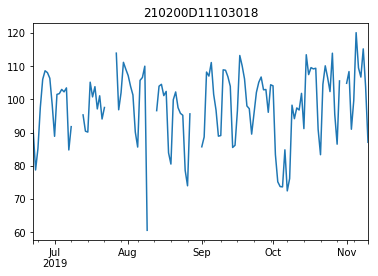

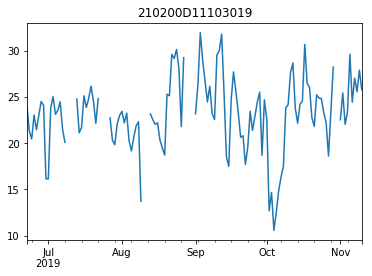

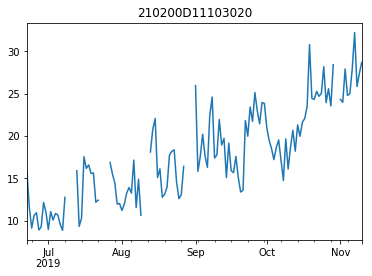

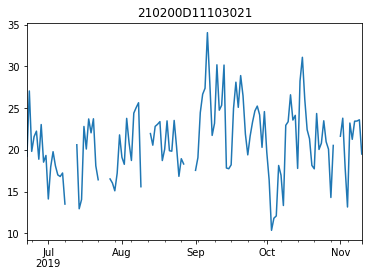

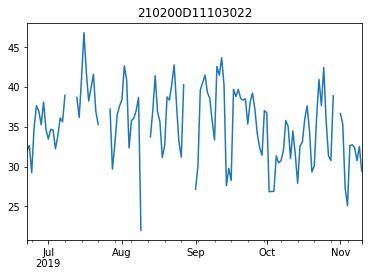

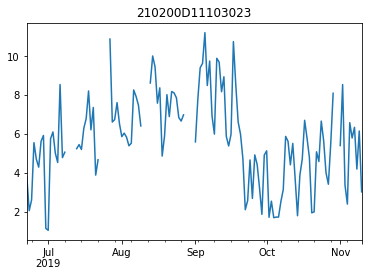

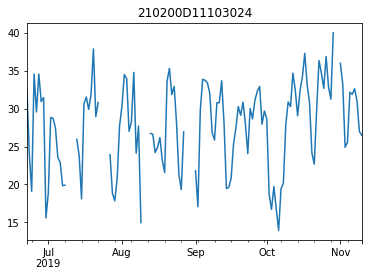

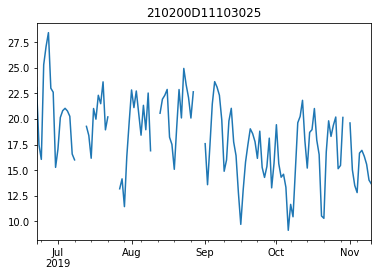

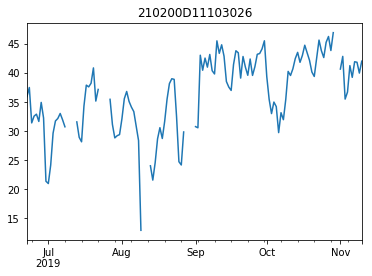

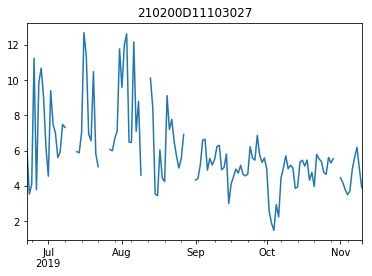

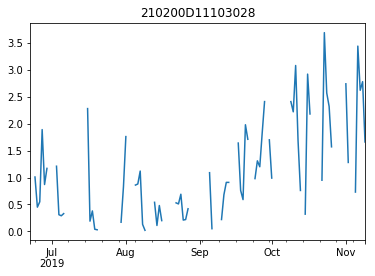

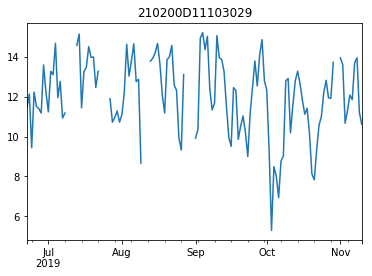

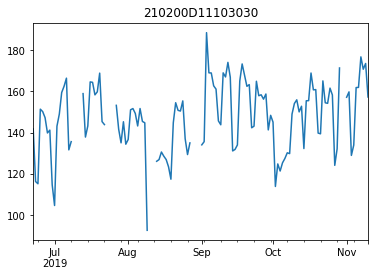

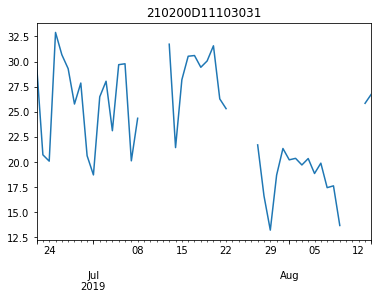

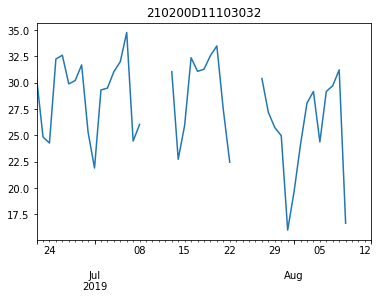

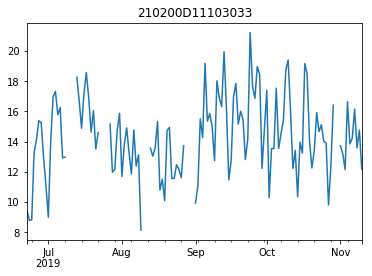

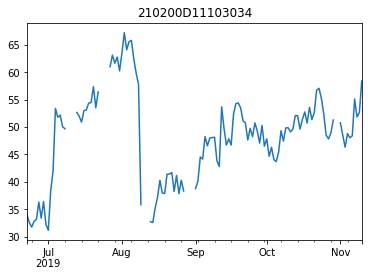

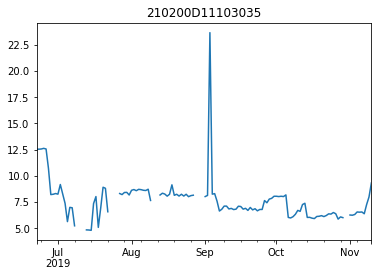

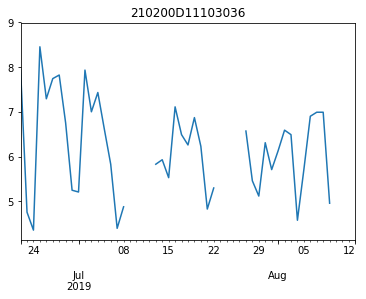

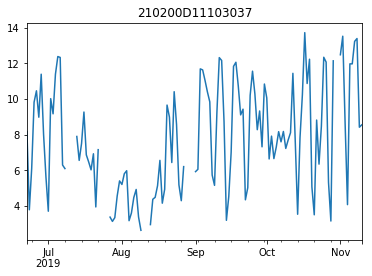

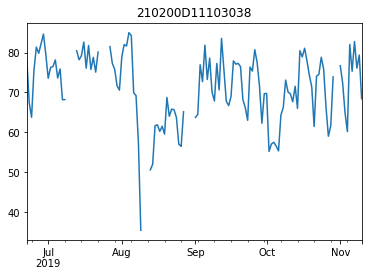

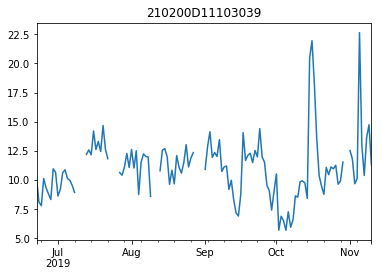

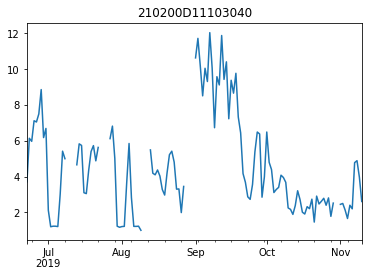

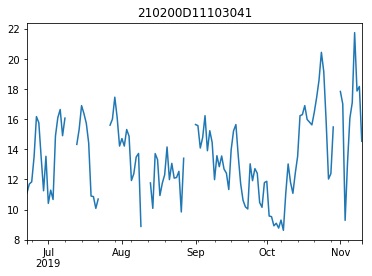

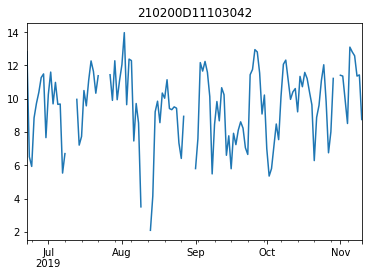

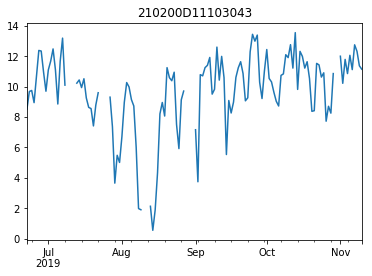

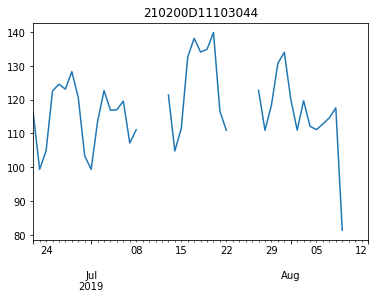

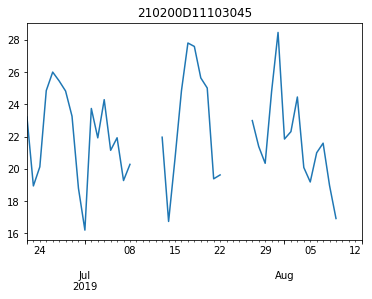

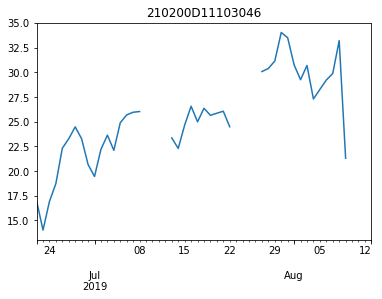

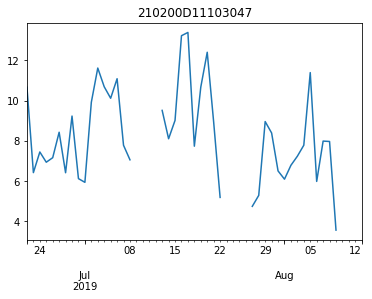

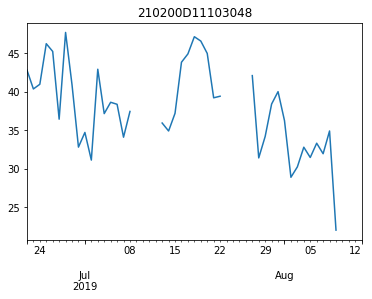

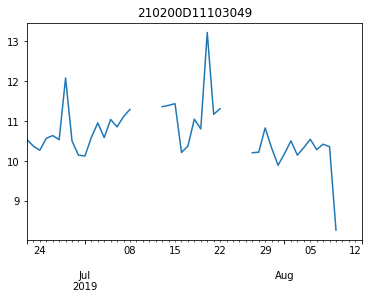

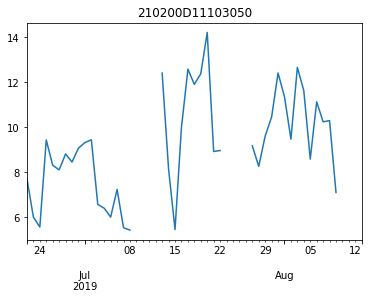

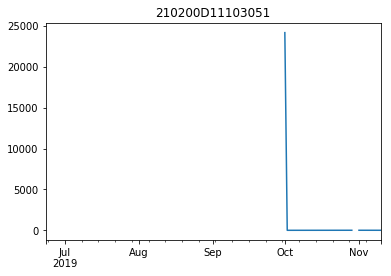

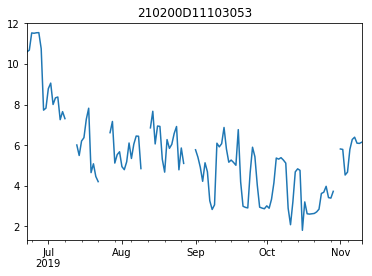

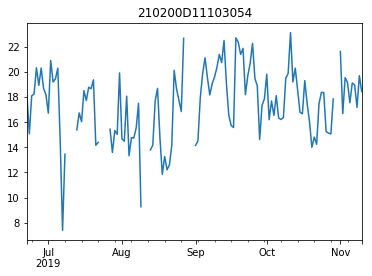

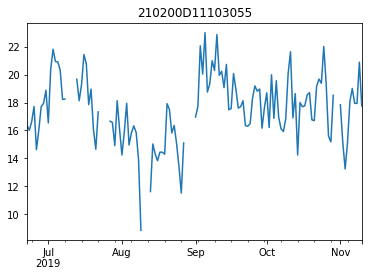

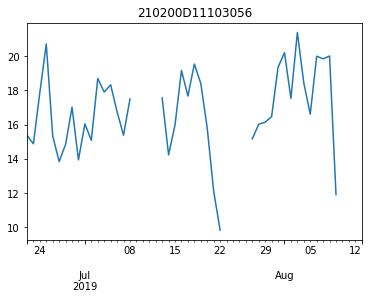

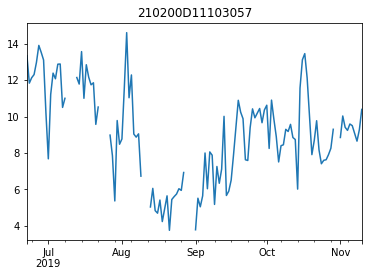

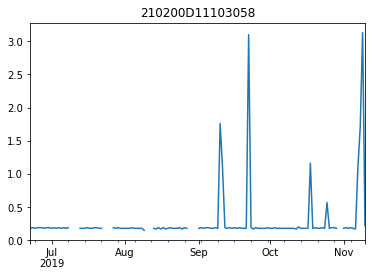

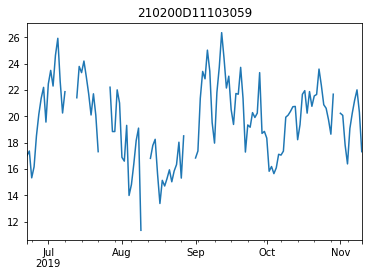

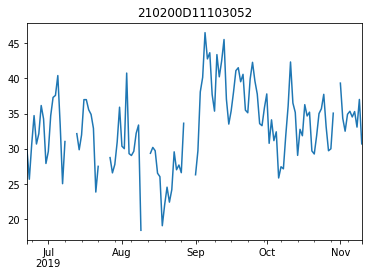

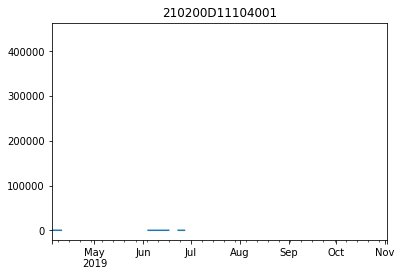

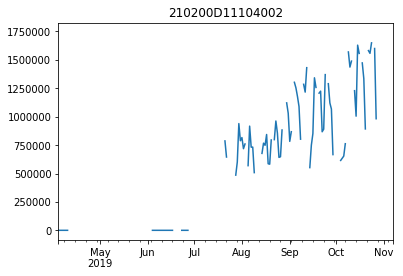

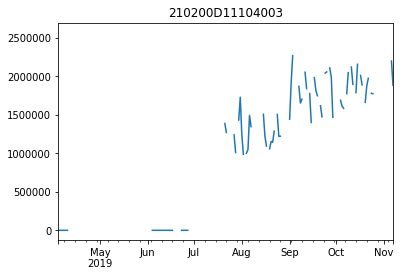

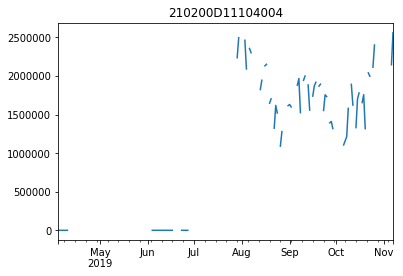

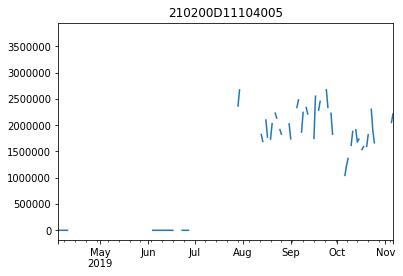

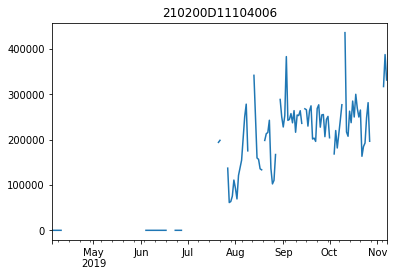

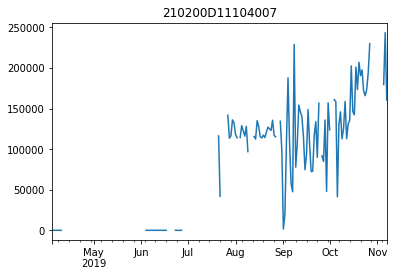

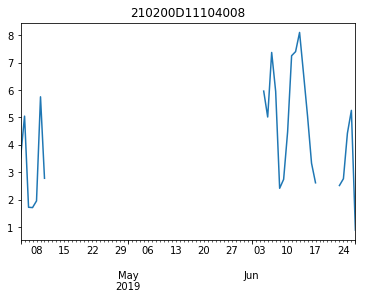

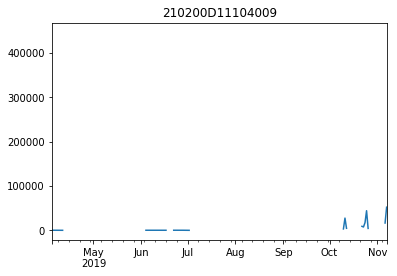

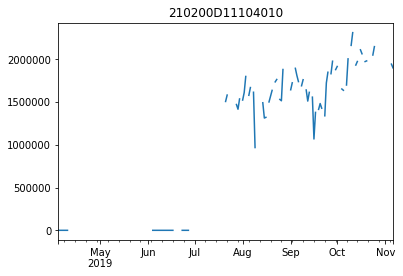

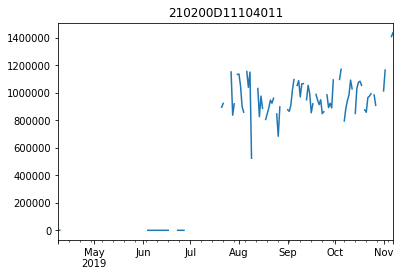

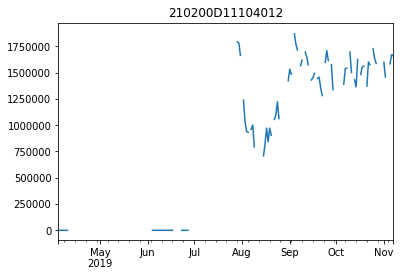

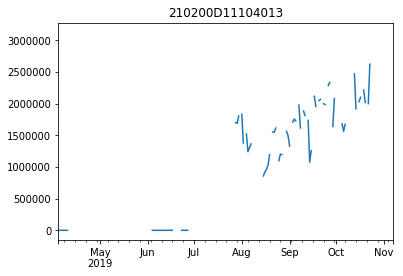

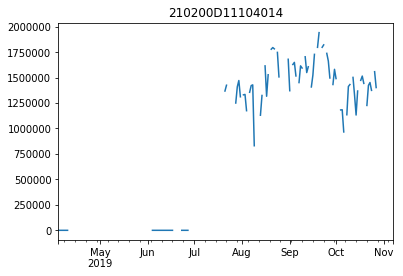

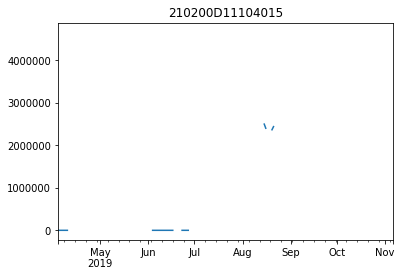

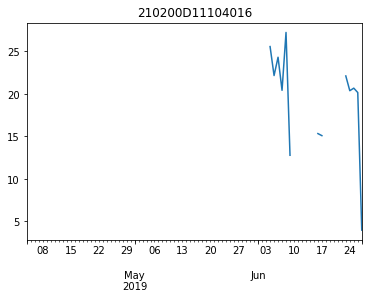

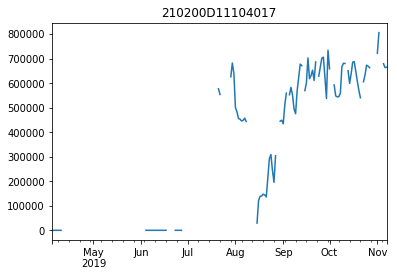

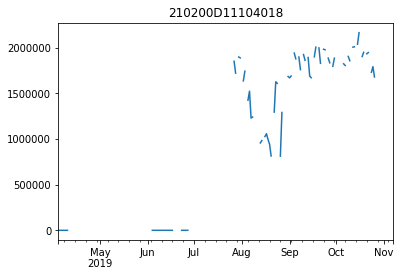

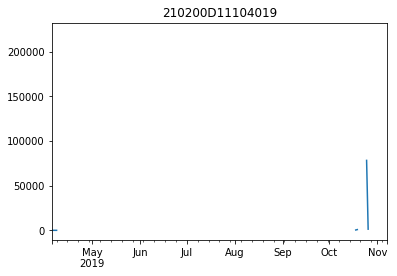

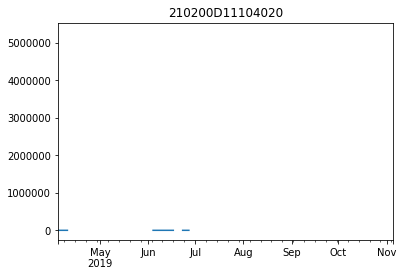

ZeroDivisionError: division by zero

In [53]:
data_quality=[]
data_file = '大黑楼逐日.csv'
for sensor_code in sensor_code_list:
    data_list_tmp=[]
    nan_count=0
    with open(data_file, 'r', encoding='UTF-8') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0]==sensor_code:
                data_list_tmp.append([datetime(2019,int(row[4]),int(row[5]),0,0),float(row[3])])
    if data_list_tmp!=[]:
        start_date=data_list_tmp[0][0]
        end_date=data_list_tmp[-1][0]
        date_list=pd.date_range(start=start_date,end=end_date).tolist()
        data_list=[]
        j=0
        for i in date_list:
            if data_list_tmp[j][0]==i:
                if data_list_tmp[j][1]>0:
                    data_list.append([i,data_list_tmp[j][1]])
                else:
                    data_list.append([i,math.nan])
                    nan_count=nan_count+1
                j=j+1
            else:
                data_list.append([i,math.nan])
                nan_count=nan_count+1
        
        while data_list!=[] and math.isnan(data_list[0][1]):
            del(data_list[0])
            nan_count=nan_count-1
        while data_list!=[] and  math.isnan(data_list[-1][1]):
            del(data_list[-1])
            nan_count=nan_count-1
        if data_list!=[]:
            data_set=np.array(data_list)
            data_series=pd.Series(data_set[:,1],index=data_set[:,0]).astype(float)
            time_span=(data_series.index[-1]-data_series.index[0]).days
            data_quality.append({'sensor_code':sensor_code,'time_span':time_span,'percentage':1-nan_count/time_span})
            data_series.plot(title=sensor_code)
            plt.show()

In [54]:
df=pd.DataFrame(data_quality)
df

sensor_code  time_span  percentage
0    210200D11101001        214    0.897196
1    210200D11101002        311    0.890675
2    210200D11101027        311    0.903537
3    210200D11101006          2    1.000000
4    210200D11101005         97    0.721649
..               ...        ...         ...
155  210200D11104016         84    0.166667
156  210200D11104017        217    0.506912
157  210200D11104018        217    0.414747
158  210200D11104019        216    0.046296
159  210200D11104020        215    0.251163

[160 rows x 3 columns]